<a href="https://colab.research.google.com/github/Melisa7L/FIA2023-TPI/blob/main/FIA2023_TPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Crear un repositorio llamado FIA2023-TPI**

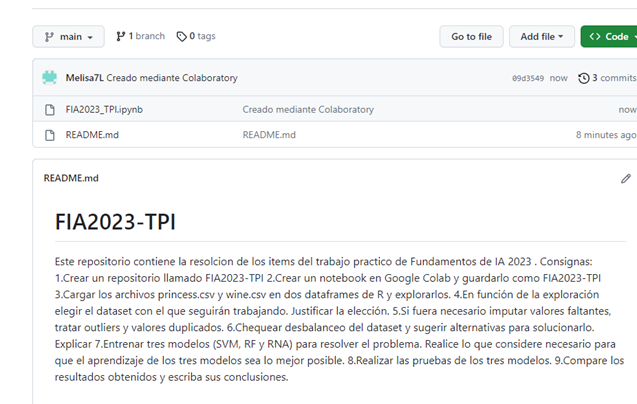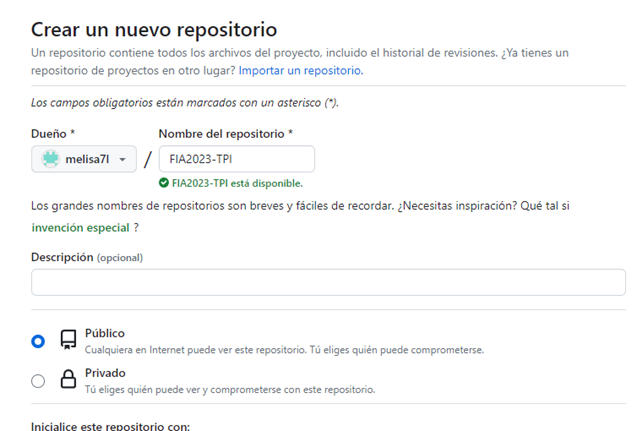

**2.Crear un notebook en Google Colab y guardarlo como FIA2023-TPI**
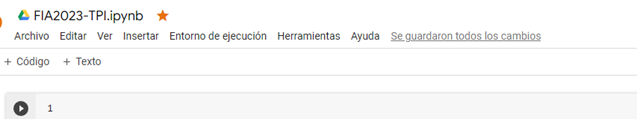

**3.Cargar los archivos princess.csv y wine.csv en dos dataframes de R y explorarlos.**

librerias

In [7]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')
install.packages('lubridate')#para trabajar con fechas
install.packages('ggplot2')#Para graficos
install.packages('ggdist')#Para graficos (histogramas)
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘distributional’, ‘numDeriv’, ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



importamos las librerias

In [8]:
library('neuralnet')
library('NeuralNetTools')
library('ggplot2')
library('gridExtra')
library('lubridate')
library('ggdist')
library('dplyr')
library('randomForest')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:neuralnet’:

    compute


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [9]:
# cargo los archivos princess.csv y wine.csv en dos dataframes
df_princess <- read.csv("/content/princess.csv")
df_wine <- read.csv("/content/wine.csv")
#Exploramos los datos
head(df_princess) # muestra las primeras filas del dataset princess
head(df_wine) # muestra las primeras filas del dataset wine

,Phoenix.Feather,Unicorn.Horn,Dragon.s.Blood,Mermaid.Tears,Fairy.Dust,Goblin.Toes,Witch.s.Brew,Griffin.Claw,Troll.Hair,Kraken.Ink,Minotaur.Horn,Basilisk.Scale,Chimera.Fang,Cured
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
2,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
3,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
4,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
5,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
6,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


In [10]:
summary(df_princess) # muestra un resumen con las estadísticas de cada columna de princess

 Phoenix.Feather  Unicorn.Horn   Dragon.s.Blood  Mermaid.Tears  
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 1st Qu.: 8.50   1st Qu.: 5.30   1st Qu.: 9.60   1st Qu.: 7.60  
 Median :14.70   Median : 9.50   Median :15.80   Median :13.10  
 Mean   :15.37   Mean   :10.95   Mean   :16.12   Mean   :13.63  
 3rd Qu.:21.30   3rd Qu.:15.57   3rd Qu.:22.00   3rd Qu.:19.00  
 Max.   :42.10   Max.   :34.10   Max.   :40.80   Max.   :35.80  
   Fairy.Dust      Goblin.Toes     Witch.s.Brew     Griffin.Claw  
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 8.625   1st Qu.: 7.90   1st Qu.: 6.325   1st Qu.: 8.40  
 Median :14.500   Median :13.50   Median :11.200   Median :14.40  
 Mean   :15.069   Mean   :14.16   Mean   :12.329   Mean   :14.91  
 3rd Qu.:20.700   3rd Qu.:19.50   3rd Qu.:16.900   3rd Qu.:20.50  
 Max.   :40.400   Max.   :37.80   Max.   :37.300   Max.   :39.40  
   Troll.Hair      Kraken.Ink    Minotaur.Horn   Basilisk.Scale 
 Min.   : 1

In [11]:
summary(df_wine) # muestra un resumen con las estadísticas de cada columna de princess

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [12]:
str(df_princess) # muestra la estructura del dataset princess

'data.frame':	2338 obs. of  14 variables:
 $ Phoenix.Feather: num  2.4 2.1 17.2 8.4 22.1 21.9 30 16.4 28.4 11.8 ...
 $ Unicorn.Horn   : num  18.7 6 13.9 9.7 10.8 5.5 8.6 12.1 18.9 17.7 ...
 $ Dragon.s.Blood : num  18.4 15 23.8 6.8 16.4 11.5 29.1 14.2 30.3 8.8 ...
 $ Mermaid.Tears  : num  27.9 13.3 6.8 26.9 10.5 5 26 22 5.6 22.9 ...
 $ Fairy.Dust     : num  7.9 15.6 10.7 4.6 22 27.9 18.6 15.6 18 6.1 ...
 $ Goblin.Toes    : num  9.6 13.1 15.8 29.1 23.4 20.9 13.8 10.4 9.9 5.8 ...
 $ Witch.s.Brew   : num  18.3 11 19.4 14.6 2.6 20.5 3.8 11.7 6.2 15.7 ...
 $ Griffin.Claw   : num  13.2 5 2.7 19.7 18.2 22.7 19.1 18.4 24.4 2.6 ...
 $ Troll.Hair     : num  2.5 7.2 15.4 18 23.8 33.9 42.3 21 14.4 16.5 ...
 $ Kraken.Ink     : num  26 26 21.2 20.8 11.3 7.4 17.3 20.3 2.7 23.7 ...
 $ Minotaur.Horn  : num  10.5 1.5 11.1 13.6 5.5 3.6 16.8 4 15.1 25.2 ...
 $ Basilisk.Scale : num  26.2 13.3 16.6 13.9 16.8 38.4 16.3 15.7 41.6 1.7 ...
 $ Chimera.Fang   : num  12.5 6.2 11.4 8.1 16.2 5.2 4.5 15.3 7 1.1 ...
 $

In [13]:
str(df_wine) # muestra la estructura del dataset wine

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : chr  "bad" "bad" "bad" "good" ...


In [14]:
nrow(df_princess)  # muestra el número de filas en el data frame
ncol(df_princess)  # muestra el número de columnas en el data frame

[1] 2338

[1] 14

In [15]:
nrow(df_wine)  # muestra el número de filas en el data frame
ncol(df_wine)  # muestra el número de columnas en el data frame

[1] 1599

[1] 12

**4.En función de la exploración elegir el dataset con el que seguirán trabajando. Justificar la elección.**



En base a lo que observe de ambos dataset ,elijo trabajar con el de "princess" . Para elegirlo tuve en cuenta estos detalles:

*   El tema: me parecio interesante analizar datos sobre cosas de fantasia como unicornios,hadas,etc.
*   Cantidad de registros y columnas: tiene mas datos que el otro dataset y me va a servir para tener mas precision o mas detalle.
*   Valores: como son todos valores numericos va a ser mas comodo trabajar con lo algoritmos.




**5.Si fuera necesario imputar valores faltantes, tratar outliers y valores duplicados.**

In [16]:
# Vemos si hay campos nulos en alguna columna
colSums(is.na(df_princess))

Phoenix.Feather    Unicorn.Horn  Dragon.s.Blood   Mermaid.Tears      Fairy.Dust 
              0               0               0               0               0 
    Goblin.Toes    Witch.s.Brew    Griffin.Claw      Troll.Hair      Kraken.Ink 
              0               0               0               0               0 
  Minotaur.Horn  Basilisk.Scale    Chimera.Fang           Cured 
              0               0               0               0

In [17]:
#Eliminamos las filas que tienen valores nulos (es una de las opciones)
df_ccard <- na.omit(df_princess)

In [18]:
#Contamos los valores en blanco en cada columna
#Usamos la función de resumen de la librería dplyr
df_princess %>% summarise_all(~ sum(. == ''))

Phoenix.Feather,Unicorn.Horn,Dragon.s.Blood,Mermaid.Tears,Fairy.Dust,Goblin.Toes,Witch.s.Brew,Griffin.Claw,Troll.Hair,Kraken.Ink,Minotaur.Horn,Basilisk.Scale,Chimera.Fang,Cured
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0


como no hay valores vacios no hace falta hacer mas

**6.Chequear desbalanceo del dataset y sugerir alternativas para solucionarlo.Explicar**

**7.Entrenar tres modelos (SVM, RF y RNA) para resolver el problema. Realice lo que considere necesario para que el aprendizaje de los tres modelos sea lo mejor posible.**

**8.Realizar las pruebas de los tres modelos.**

**9.Compare los resultados obtenidos y escriba sus conclusiones.**